<center>
<h1> Entanglement </h1>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, rand_ket, tensor, ptrace, Bloch, rand_dm

## Introduction
Entanglement is a unique and essential feature of quantum mechanics that allows quantum systems to be correlated in ways that are impossible for classical systems. This property has profound implications for quantum information processing, such as quantum computing, quantum cryptography, and quantum teleportation. In this chapter, we will explore the fundamentals of entanglement, including pure system entanglement, how to find entangled states, correlated but non-entangled states, positive but not completely positive maps, the transposition map, and the Peres-Horodecki criterion.

## Pure System Entanglement

A pure state is described by a vector in a Hilbert space, and the system is in a definite state. For a bipartite quantum system, a pure state is entangled if it cannot be expressed as a tensor product of individual system states. Mathematically, a pure state $\ket{\psi}$ of a bipartite system $AB$ is entangled if it cannot be written as

\begin{equation}
\ket{\psi}_{AB} = \ket{\phi}_A \otimes \ket{\chi}_B,
\end{equation}

where $\ket{\phi}_A$ and $\ket{\chi}_B$ are states in the Hilbert spaces of systems $A$ and $B$, respectively. Note that the converse is also true: if a pure state can be written as a tensor product of individual system states, then it is not entangled. Here we are first supposing that we somehow know how to distinguish between the two systems, and then we are asking whether the state is entangled or not.

If it is possible to write them as a tesor product, we call the system **separable**. If it is not possible, we call it **entangled**.

## How to Find Entangled States

Technicly, it should be easy to find entangled states, one could only compute the partial traces and then compute the tensor product (namelly the *marginals*). If the result is the same as the original state, then it is not entangled. If it is not, then it is entangled.

Shamefully (but also luckily) it is harder than that, because all lab measurements are noisy and deal with mixed states.And to actually for determining the separability of a mixed state one has to write all as a sum of pure states.

 One way to determine if a bipartite pure state is entangled is to compute its reduced density matrix for one of the subsystems. The reduced density matrix is obtained by taking the partial trace over the other subsystem. If the reduced density matrix represents a mixed state, then the original state is entangled. However, the map between the $A$ and $B$ subsystems is not a bijection (there are many possible decompositions), so this method is not always reliable.

 Thus, in order to actually classify correlated states and entangled states, one has to introduce *LOCC* (local operations and classical communication). This is a set of operations that can be performed locally on each subsystem, and then the results are communicated classically. This means that the operations are not allowed to be entangled.

### Correlated but Non-entangled States
In classical systems, correlations can arise due to shared information or common causes. However, these classical correlations do not give rise to the unique features of quantum entanglement. In quantum mechanics, a state can be correlated but not entangled if it is a separable mixed state. A mixed state $\rho_{AB}$ of a bipartite system is separable if it can be written as

\begin{equation}
\rho_{AB} = \sum_i p_i \rho^A_i \otimes \rho^B_i,
\end{equation}

where $p_i$ is a probability distribution, and $\rho^A_i$ and $\rho^B_i$ are density matrices of subsystems $A$ and $B$, respectively. Separable mixed states exhibit classical correlations but do not possess the unique properties of entangled states.



## Positive but Not Completely Positive Maps

One way of overcoming the problem of non-bijectivity of the map between the $A$ and $B$ subsystems is to consider the map between the $A$ and $B$ subsystems to be a positive but not completely positive map.
A linear map $\mathcal{E}: \xi(\mathcal{H}_A) \rightarrow \mathcal{H}_B$ between bounded operators on Hilbert spaces $\mathcal{H}_A$ and $\mathcal{H}_B$ is called positive if it maps positive operators to positive operators. This means that:

$$\xi(A) \geq 0 \implies (\mathcal{E} \otimes \mathcal{I}_C)(A \otimes \rho) \geq 0$$

for all $A \in \xi(\mathcal{H}_A)$ and $\rho \in \xi(\mathcal{H}_C)$, where $\mathcal{I}_C$ is the identity map on $\mathcal{H}_C$. A positive map is called completely positive if the map $\mathcal{E} \otimes \mathcal{I}_C$ is positive for all Hilbert spaces $\mathcal{H}_C$. A positive map that is not completely positive is called positive but not completely positive.

There is an interesting connection with a trace invariant map. A map $\mathcal{E}: \xi(\mathcal{H}_A) \rightarrow \mathcal{H}_B$ is trace invariant if

$$\text{Tr}(\mathcal{E}(A)) = \text{Tr}(A)$$

We're trying to figure out how to turn one quantum state into another using this maps, but it's tricky because sometimes when we use a certain type of math on a quantum state that's part of a bigger group of quantum states, we can end up with a state that's not part of that group. This is what happens with positive but not completely positive maps. They can turn a quantum state into a state that's not part of the group of quantum states. This is a problem because we want to be able to turn one quantum state into another using these maps, but we don't want to end up with a state that's not part of the group of quantum states.

To solve this problem, we require that our maps extended with the identity map is positive definite for all dimensions (namelly, **completelly positive**), i.e, 

$$\mathcal{E} \otimes \mathbf{1}_C \geq 0$$

This is where the famous Completely Positive Trace Preserving (CPTP) maps come from. They are the ones that are positive definite for all dimensions, representing all general physical operations. 


## Transposition Map

A common example of a positive but not completely positive map is the transposition map, denoted by $\mathcal{T}$. The transposition map acts on a matrix by taking its transpose:

\begin{equation}
\mathcal{T}(\rho) = \rho^T,
\end{equation}

where $\rho$ is an operator in the Hilbert space of a quantum system, and $\rho^T$ is its transpose. The transposition map is positive but not completely positive.

To see that the transposition map can detect entanglement, let $\rho_{AB}$ be the density matrix of a bipartite quantum state. If the partial transpose of $\rho_{AB}$ with respect to subsystem $A$ is not positive, i.e.,

\begin{equation}
(\mathcal{T}_A \otimes \mathcal{I}_B)(\rho_{AB}) \not\ge 0,
\end{equation}

then the state $\rho_{AB}$ is entangled.

## Peres-Horodecki Criterion

The Peres-Horodecki criterion, also known as the positive partial transpose (PPT) criterion, is a powerful tool for detecting entanglement in bipartite quantum states. It states that a **bipartite mixed state $\rho_{AB}$ is separable if and only if its partial transpose with respect to either subsystem is positive**:

\begin{equation}
(\mathcal{T}_A \otimes \mathcal{I}_B)(\rho_{AB}) \ge 0 \quad \text{and} \quad (\mathcal{I}_A \otimes \mathcal{T}_B)(\rho_{AB}) \ge 0.
\end{equation}

For $2 \times 2$ and $2 \times 3$ systems, the Peres-Horodecki criterion provides a necessary and sufficient condition for separability. However, for higher-dimensional systems, the criterion is only a necessary condition. This means that if the partial transpose of a state is positive, we cannot conclude that it is separable; it may still be entangled.


## Lets code a bit

Let us generate random pure states and plot them on a Bloch sphere, showing their entanglement by checking the eigenvalues of the reduced density matrix. We will also generate random mixed states and plot their partial transposes to illustrate the Peres-Horodecki criterion.

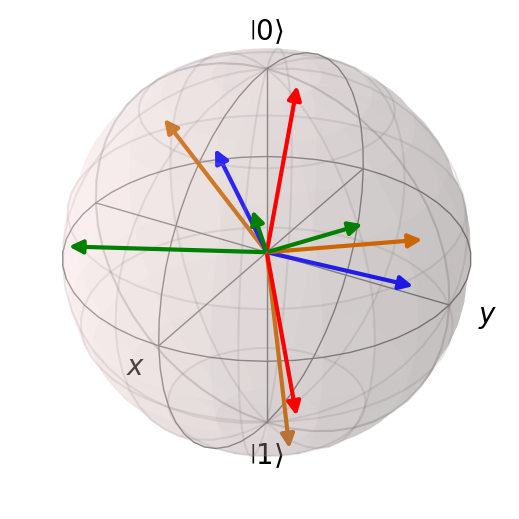

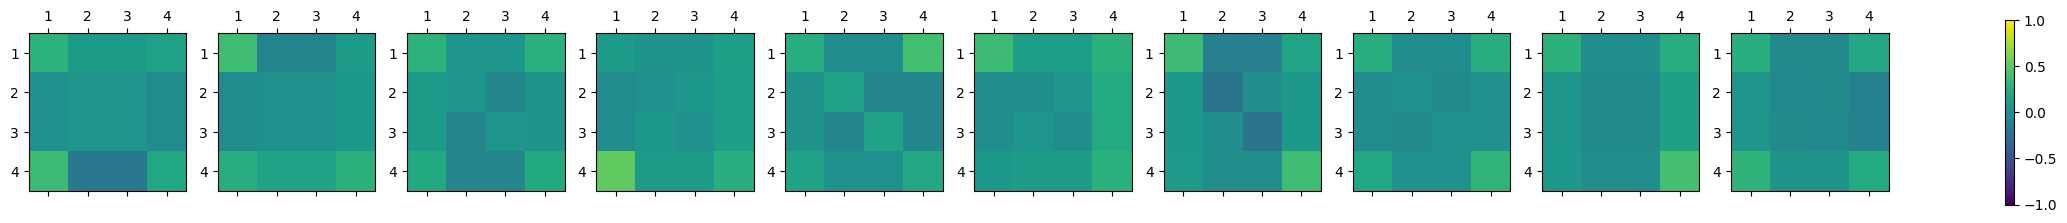

In [12]:
def is_entangled(psi) -> bool:
    """Check if a state is entangled.

    Args:
        psi (Qobj): State to check.

    Returns:
        bool: True if the state is entangled, False otherwise.
    """
    rho_A = ptrace(psi * psi.dag(), 0)
    return any(np.isclose(eigenvalue, 0) for eigenvalue in rho_A.eigenenergies())

def plot_pure_states(num_states=10) -> None:
    b = Bloch()
    b.add_states([rand_ket(2) for _ in range(num_states)])
    b.show()

def plot_mixed_states(num_states=10):
    """Plot mixed states partial transposes.

    Args:
        num_states (int, optional): Number of states to plot. Defaults to 10.   
    """
    fig, axes = plt.subplots(1, num_states, figsize=(3 * num_states, 3))
    for i in range(num_states):
        rho = rand_dm(4, density=1).full().reshape(2, 2, 2, 2)
        rho_pt = np.einsum('ijkl->ikjl', rho).reshape(4, 4)
        im = axes[i].matshow(rho_pt.real, cmap='viridis', vmin=-1, vmax=1)
        axes[i].set_xticks(range(4))
        axes[i].set_yticks(range(4))
        axes[i].set_xticklabels(range(1, 5))
        axes[i].set_yticklabels(range(1, 5))
    fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
    plt.show()

# Plot pure states on the Bloch sphere
plot_pure_states()

# Plot mixed states partial transposes
plot_mixed_states()


## Conclusion
In conclusion, entanglement is a fundamental concept in quantum information, providing a unique form of correlation that enables many powerful applications. In this chapter, we explored the basics of entanglement, including pure system entanglement, how to find entangled states, correlated but non-entangled states, positive but not completely positive maps, the transposition map, and the Peres-Horodecki criterion.